# New Section

Early Start: {'A': 0, 'B': 10, 'C': 25, 'D': 45, 'E': 45, 'F': 60}
Early Finish: {'A': 10, 'B': 25, 'C': 45, 'D': 60, 'E': 55, 'F': 65}
Late Start: {'F': 60, 'E': 50, 'D': 45, 'C': 25, 'B': 10, 'A': 0}
Late Finish: {'F': 65, 'E': 60, 'D': 60, 'C': 45, 'B': 25, 'A': 10}
Total Float: {'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 5, 'F': 0}
Critical Path: ['A', 'B', 'C', 'D', 'F']


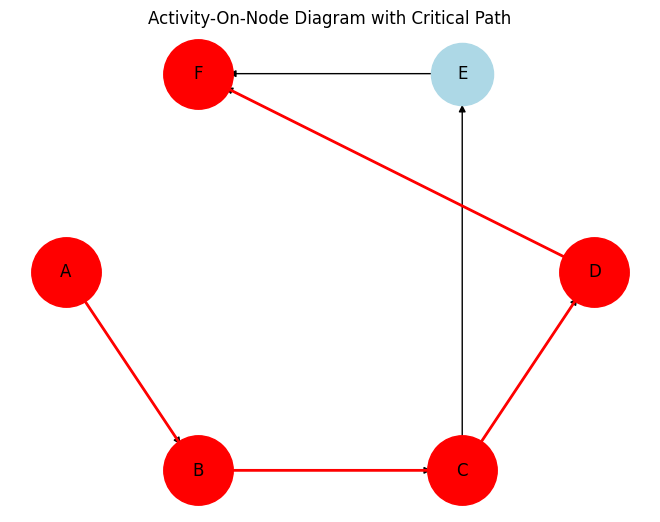

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

# Function for Forward Pass
def forward_pass(activities):
    early_start = {}
    early_finish = {}
    for activity, details in activities.items():
        dependencies = details['dependencies']
        if not dependencies:  # No dependencies
            early_start[activity] = 0
        else:
            early_start[activity] = max(early_finish[dep] for dep in dependencies)
        early_finish[activity] = early_start[activity] + details['duration']
    return early_start, early_finish

# Function for Backward Pass
def backward_pass(activities, early_finish):
    late_start = {}
    late_finish = {}

    # Find the last activity (project end time)
    last_activity = max(early_finish, key=early_finish.get)
    for activity in reversed(list(activities.keys())):
        if activity == last_activity:
            late_finish[activity] = early_finish[activity]
        else:
            dependents = [k for k, v in activities.items() if activity in v['dependencies']]
            if dependents:
                late_finish[activity] = min(late_start[dep] for dep in dependents)
            else:
                late_finish[activity] = early_finish[activity]
        late_start[activity] = late_finish[activity] - activities[activity]['duration']
    return late_start, late_finish

# Function to calculate float and critical path
def calculate_float(early_start, late_start):
    total_float = {activity: late_start[activity] - early_start[activity] for activity in early_start}
    critical_path = [activity for activity, tf in total_float.items() if tf == 0]
    return total_float, critical_path

# Function to visualize the graph and highlight the critical path
def visualize_graph_with_critical_path(activities, critical_path):
    G = nx.DiGraph()

    # Add nodes (tasks) and edges (dependencies) to the graph
    for activity, details in activities.items():
        G.add_node(activity, duration=details['duration'])
        for dependency in details['dependencies']:
            G.add_edge(dependency, activity)

    # Use shell_layout for better visualization
    pos = nx.shell_layout(G)

    # Draw the graph
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue')

    # Highlight the critical path
    critical_edges = [(critical_path[i], critical_path[i + 1]) for i in range(len(critical_path) - 1)]
    nx.draw_networkx_edges(G, pos, edgelist=critical_edges, edge_color='red', width=2, arrows=True)

    # Highlight nodes in the critical path
    nx.draw_networkx_nodes(G, pos, nodelist=critical_path, node_color='red', node_size=2500)

    # Add labels for task durations
    labels = nx.get_edge_attributes(G, 'duration')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

    plt.title("Activity-On-Node Diagram with Critical Path")
    plt.show()

# Define the construction project activities
activities = {
    'A': {'duration': 10, 'dependencies': []},  # Preparing the site
    'B': {'duration': 15, 'dependencies': ['A']},  # Building the foundation
    'C': {'duration': 20, 'dependencies': ['B']},  # Constructing the main structure
    'D': {'duration': 15, 'dependencies': ['C']},  # Adding walls and roof
    'E': {'duration': 10, 'dependencies': ['C']},  # Finishing and utilities
    'F': {'duration': 5, 'dependencies': ['D', 'E']}  # Final touches and delivery
}

# Step 1: Perform Forward Pass
early_start, early_finish = forward_pass(activities)

# Step 2: Perform Backward Pass
late_start, late_finish = backward_pass(activities, early_finish)

# Step 3: Calculate Float and Critical Path
total_float, critical_path = calculate_float(early_start, late_start)

# Display results
print("Early Start:", early_start)
print("Early Finish:", early_finish)
print("Late Start:", late_start)
print("Late Finish:", late_finish)
print("Total Float:", total_float)
print("Critical Path:", critical_path)

# Visualize the project graph with the critical path
visualize_graph_with_critical_path(activities, critical_path)